Importowanie bibliotek
(jeśli nie działa, wpisz w konsolę):

$ pip install xarray

$ pip install numpy

$ pip install os

rozpakuj soil_example.zip

In [1]:
import xarray as xr
import os
import numpy as np

Pobranie i konwersja danych

In [2]:
file_path = "soil_example.nc"
ds = xr.open_dataset(file_path)
df = ds.to_dataframe()

Liczenie średniej wilgotności gleby w "mini"-obszarze (~100km x ~100 km)

In [4]:
def find_mean_sot(lon, lat, eps):
    return df.loc[(df.sot.notnull()) &
    (lon-eps<df.longitude) & (df.longitude<lon+eps) &
    (lat-eps<df.latitude) & (df.latitude<lat+eps)].sot.mean()

Funkcja generująca szachownicę

In [5]:
def make_grid(lon_start, lat_start, grid_size):
    grid = []
    jump = 1/grid_size 
    for ir in range(grid_size):
        row = []
        lon = lon_start+ir*jump
        for ic in range(grid_size):
            lat = lat_start + ic*jump
            val = find_mean_sot(lon, lat, jump)
            row.append(val)
        grid.append(row)
    return grid

Przykładowy wykres wilgotności

<Axes: xlabel='latitude', ylabel='longitude'>

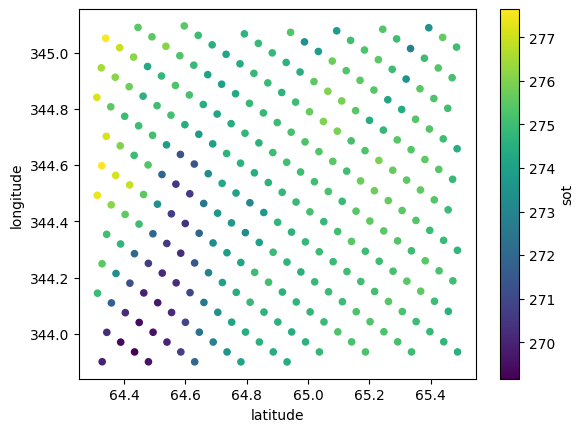

In [6]:
df_s = df.loc[(df.sot.notnull()) &
(343.9<df.longitude) & (df.longitude<345.1) &
(64.3<df.latitude) & (df.latitude<65.5)]
df_s.plot.scatter(x="latitude", y="longitude",
c="sot", colormap="viridis")

Przykładowa szachownica

In [11]:
grid_size = 10
grid = make_grid(344, 64.4, grid_size)

print(f"RANGE: LONGITUDE: from {344} to {345}; LATITUDE: from {64.4} to {65.4}\n")
print(f"SIZE: {grid_size} x {grid_size}\n")

for ir in range(grid_size-1,-1,-1):
    print(grid[ir])

RANGE: LONGITUDE: from 344 to 345; LATITUDE: from 64.4 to 65.4

SIZE: 10 x 10

[275.7627, 275.15527, 274.8838, 274.42896, 274.5349, 274.77954, 275.13794, 275.65747, 275.2618, 274.85864]
[275.65918, 275.03595, 274.7568, 274.37646, 274.5724, 274.91306, 275.49268, 275.77856, 275.02597, 274.91846]
[275.5093, 274.4652, 273.40524, 273.9607, 274.67114, 274.9881, 275.4834, 275.52856, 275.20938, 275.1848]
[276.33847, 273.55786, 272.3045, 273.72052, 274.53735, 274.85254, 275.1394, 275.27124, 275.48828, 275.60034]
[276.61478, 273.50876, 271.8218, 273.02856, 273.98114, 274.36368, 275.01065, 275.2077, 275.45044, 275.55664]
[275.1731, 272.90454, 271.66724, 272.68536, 273.56796, 274.261, 274.87454, 275.1298, 275.38766, 275.40244]
[273.54175, 271.3899, 271.38135, 273.07007, 274.1254, 274.66895, 274.80136, 275.02493, 275.19263, 275.19235]
[272.427, 270.52515, 271.0464, 273.06348, 274.54565, 274.8081, 274.7832, 274.95508, 275.07202, 275.24902]
[270.90894, 270.0581, 270.99454, 273.0546, 274.39868, 274.71